# Preprocessing & Modeling

## Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import linear_model

import folium
from folium import plugins
import os
import json
import requests
import datetime as dt
import hmac
from geopy.geocoders import Nominatim

## Conditions

In [31]:
import warnings
warnings.filterwarnings('ignore')

## Data Imports

In [5]:
pow_df = pd.read_csv('data/pow_cleaned.csv')
cap_df = pd.read_csv('data/cap_cleaned.csv')
na_df = pd.read_csv('data/na_cleaned.csv')
test_df = pd.read_csv('data/test.csv')

## Preprocessing

In [10]:
pow_df = pd.get_dummies(pow_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first = True)

In [11]:
X = pow_df.drop(columns = 'score')
y = pow_df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33)

In [12]:
y_train.value_counts(normalize=True)

 0.00     0.005349
-32.34    0.004394
-31.50    0.004202
-36.80    0.004011
-31.98    0.003820
            ...   
-29.26    0.000191
-12.04    0.000191
-1.38     0.000191
-41.65    0.000191
-52.08    0.000191
Name: score, Length: 1259, dtype: float64

In [13]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [14]:
lr = linear_model.LinearRegression()
lasso = Lasso()
ridge = Ridge()

## LASSO Regression Model

In [15]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

0.9518311103454667

In [16]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.9756074026819358

In [17]:
lasso.fit(X_train_sc, y_train)
lasso.score(X_train_sc, y_train), lasso.score(X_test_sc, y_test)

(0.9518860789524635, 0.9526623451186766)

In [18]:
lasso_pred = lasso.predict(X_test_sc)

In [19]:
r2_score(y_test, lasso_pred)

0.9526623451186766

In [20]:
lasso_res = y_test - lasso_pred

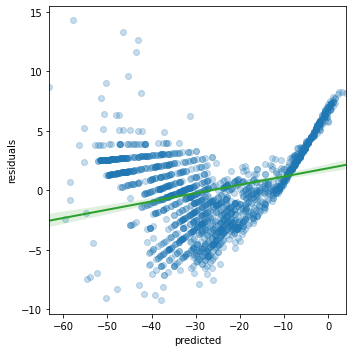

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(lasso_pred, lasso_res, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

## Ridge Regression Model

In [22]:
ridge.fit(X_train_sc, y_train)
ridge.score(X_train_sc, y_train), ridge.score(X_test_sc, y_test)

(0.9993675012608096, 0.9762118511012685)

In [23]:
ridge_pred = ridge.predict(X_test_sc)

In [24]:
r2_score(y_test, ridge_pred)

0.9762118511012685

In [25]:
ridge_res = y_test - ridge_pred

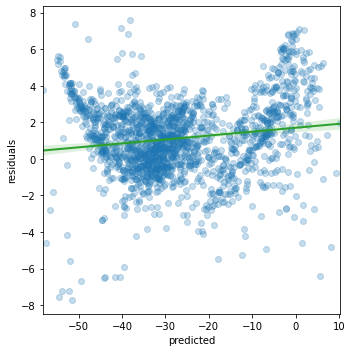

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(ridge_pred, ridge_res, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

## Regression Metrics

In [27]:
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

model_r2 = {
    'model': ['LASSO', 'Ridge'],
    'r2_score': [lasso_r2, ridge_r2]
}

models_df = pd.DataFrame(model_r2)

models_df.sort_values('model', inplace = True )

models_df.reset_index(inplace = True)

models_df.drop(columns = 'index', inplace = True)

models_df.head()

,model,r2_score
0,LASSO,0.952662
1,Ridge,0.976212


### Predicted Dataframe:

In [29]:
m = folium.Map(location=[39, -98], zoom_start=3)

test_df.apply(lambda row:folium.CircleMarker(location=[row['longitude'], row['latitude']], 
                                            radius = 1, color = 'Red')
                                             .add_to(m), axis=1)

folium.TileLayer('stamenterrain').add_to(m)
folium.TileLayer('stamentoner').add_to(m)
folium.TileLayer('stamenwatercolor').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)

folium.LayerControl().add_to(m)

from folium.plugins import MeasureControl
m.add_child(MeasureControl())

m

In [30]:
test_df.head()

,longitude,latitude,dist_to_land,avg_wave_height,ncf,lcoe,capacity,net_value,avg_wind_speed
0,30.814830,-114.173867,27.99,1.34,0.45,319,0.28,-109,8.23
1,30.285002,-113.513984,13.81,0.37,0.46,189,0.22,-144,9.11
2,29.828572,-113.338016,11.46,0.75,0.46,207,0.22,-128,7.65
3,30.814830,-114.349835,10.31,0.65,0.49,244,0.28,-115,8.32
4,29.484875,-112.986079,37.94,0.70,0.49,270,0.28,-116,9.12
